# Uppgift 1 - Formlernas innebörd

## 1. $ S_{k+1}=S_{k}-b\cdot I_{k}\cdot S_{k} $

### $ b\ =\ kontakter\ per\ smittad\ per\ dag $

### $ \frac{dS}{dt}=-b\cdot S\cdot I $

Antalet mottagliga minskar med en hastighet som är proportionell mot produkten av antalet mottagliga och antalet infekterade.

Ju färre mottagliga, desto långsammmare sprider sig smittan och. Ju fler infekterade, desto snabbare sprider sig smittan. 

Därav beskriver $ S_{k+1} $ antalet mottagliga individer på en given dag som differensen mellan antalet mottagliga dagen innan och den momentana minskningen av antalet mottagliga dagen innan.  

## 2. $ I_{k+1\ }=\ I_{k}\ +\ b\cdot I_{k}\cdot S_{k}-\frac{I_{k}}{a} $

### $ a\ =\ tiden\ som\ en\ individ\ är\ smittsam $

### $ \frac{dI}{dt}=b\cdot S\cdot I-\frac{I}{a} $

Antalet infekterade *ökar* med den hastighet som antalet mottagliga minskar, men minskar även samtidigt i och med att en del av de infekterade tillfrisknar, därav $ -\frac{I}{a} $.

Alltså beskriver $ I_{k+1} $ antalet infekterade på en given dag som summan av antalet infekterade individer dagen innan och förändringen av infekterade idivider dagen innan. 

## 3. $ R_{k+1}\ =\ R_{k}+\frac{I_{k}}{a} $

### $ \frac{dR}{dt}=\frac{I}{a} $

Antalet tillfrisknade ökar med den hastighet som de infekterade tillfrisknar. 

Alltså beskriver $ R_{k+1} $ antalet återhämtade individer på en given dag som summan av antalet återhämtade dagen innan och antalet individer som blev friska dagen innan.

# Uppgift 2 & 3 - Implementering av SIR-modellen

In [204]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
def SIR_model(N, S0, a, b, days):
    
    print(f"Utveckling efter {days} dagar")
    
    S = np.zeros(days) 
    I = np.zeros(days)
    R = np.zeros(days)
    
    S[0] = S0
    I[0] = N-S[0]
    
    for k in range(days-1):
        S[k+1] = S[k] - b*I[k]*S[k]
        I[k+1] = I[k] + b*I[k]*S[k] - I[k]/a
        R[k+1] = R[k] + I[k]/a

    fig = plt.figure(1); fig.clf()
    plt.plot(S/(10**6), "r", lw=1, label = "Mottagliga")
    plt.plot(I/(10**6), "g", lw=1, label = "Infekterade")
    plt.plot(R/(10**6), "b", lw=1, label = "Friska")
    fig.legend(); plt.xlabel("Dagar"); plt.ylabel("Antal individer (1e6)");

#### $ b\ =\ 2\cdot10^{-7}: $

Utveckling efter 730 dagar


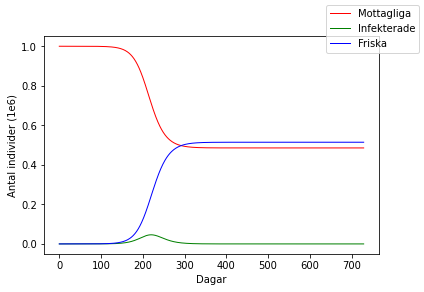

In [212]:
SIR_model(1000000, 999999, 7, 2*(10**-7), 730) 

#### $ b\ =\ 1.7\cdot10^{-7}: $

Utveckling efter 730 dagar


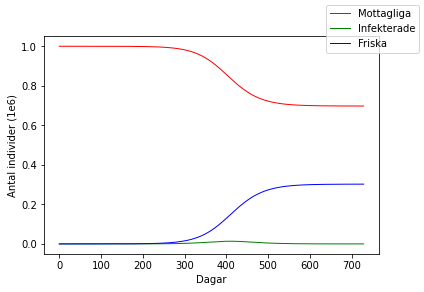

In [213]:
SIR_model(1000000, 999999, 7, 1.7*(10**-7), 730)

#### $ b\ =\ 2.3\cdot10^{-7}: $

Utveckling efter 730 dagar


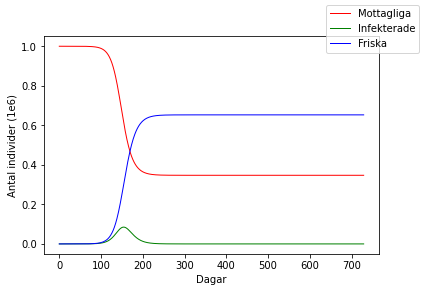

In [214]:
SIR_model(1000000, 999999, 7, 2.3*(10**-7), 730)

#### $ a\ =\ 6: $

Utveckling efter 730 dagar


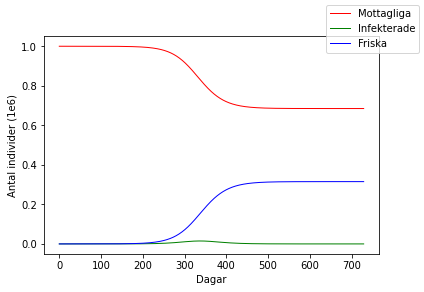

In [215]:
SIR_model(1000000, 999999, 6, 2*(10**-7), 730)

#### $ a\ =\ 8: $

Utveckling efter 730 dagar


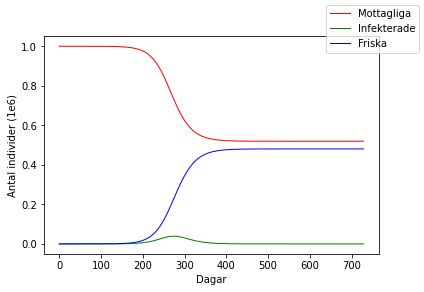

In [216]:
SIR_model(1000000, 999999, 8, 1.7*(10**-7), 730)

# Uppgift 4 - Plana ut kurvan

### Vad innebär det att plana ut kurvan och varför är det viktigt?

Det man menar med att plana ut kurvan är att man minskar hastigheten med vilken människor smittas. Detta hjälper oss undvika en överbelastad sjukvård och gör samtidigt att vi vinner tid till utvecklande av vaccin/behandlingar.

### Vad är viktigt att uppnå för att kurvan ska planas ut?

Resultaten av ovanstående implementering av SIR-modellen gör att vi kan dra slutsatser om vad som är viktigt att uppnå när epidemier/pandemier råder. 

För det första kan vi se att ju lägre värdet på $ b $, det vill säga antalet kontakter som en smittad människa har med andra människor per dag, desto plattare blir kurvan för de infekterade. Det är således därför åtgärder såsom social distansering är viktiga och effektfulla. 

För det andra kan vi även se att kurvan plattas ut mer ju lägre värdet på $ a $, det vill säga antalet dagar som en individ är smittsam, vilket ter sig naturligt i och med att ju kortare tid en person är smittsam desto färre hinner personen föra vidare smittan till. En minskning av $ a $ kan uppnås med hjälp av förbättrad behandling exempelvis.